# Data Pre-processing in Pathrise project

### Business Understanding:

Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech.

Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining the program and successfully
passes all stages of the admission process, they receive an offer to join Pathrise and become a fellow.

The first 2 weeks in the program are called a free trial period and a fellow can withdraw within this free trial period without any penalty. After 2 weeks, a fellow needs to sign an ISA (Income Share Agreement) with us if they want to stay in the program. The entire program lasts up to a year, including 8 weeks of the core curriculum. 
If a fellow is unable to find a job within a year after joining Pathrise, his/her contract is terminated. However, there might be some exceptions. For instance, if someone was on a break, pathrise company may extend their contract for the period of the break.

On average, for fellows who stay with pathrise after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for Pathrise business. In this exercise Pathrise provides you with a sample of information they collected from their fellows from the moment they joined the program. Please don’t expect this data set to be perfect, it never happens in the real world.

The main goal of the analysis is to derive insights around : 
##### 1- If a fellow will ultimately be placed at a company
and
##### 2- How long until a placement can be expected.

### Features Description
* **ID**: unique ID of a fellow. 
* **Pathrise_status**: status of a fellow in the program.
  * Active: currently in the program,
  * Break: on a temporary break, 
  * Closed Lost: didn't accept our offer,
  * Deferred: accepted our offer, but willing to start later,
  * MIA: missed in action - joined the program, but stopped being involved,
  * Placed: got placed through the program,
  * Withdrawn: got withdrawn due to not being active or for some other reason,
  * Withdrawn (Failed): got withdrawn due to not finding a job after one year of going through the program,
  * Withdrawn (Trial): didn't stay in the program after a free trial period.
* **Primary_track**: field of track.
  * Data,
  * Design, 
  * Marketing,
  * PSO, 
  * SWE,
  * Web.
* **Cohort_tag**: each cohort starts on the first (A) and the third week (B) of the month. 
  * For instance, FEB20A/FEB20B cohort starts on the first/third Monday of February 2020. 
* **Program_duration_days**: how many days a fellow was in the program, N/A for current fellows.
* **Placed**: whether a fellow was placed while going through the program (pathrise_status==placed). 
* **Employment_status**: employment status when joined the program. 
  * contractor, 
  * Employed Full-Time, 
  * Employed Part-Time, 
  * Student, 
  * Unemployed. 
* **Highest_level_of_education**: highest level of education when joined the program. 
  * Bachelor's Degree, 
  * Doctorate or Professional Degree,
  * GED or equivalent, 
  * High School Graduate, 
  * Master's Degree, 
  * Some College No Degree,
  * Some High School.
* **Length_of_job_search**: length of a job search before joining the program. 
* **Biggest_challenge_in_search**: biggest challenge in a job search (self-reported).  
  * Behavioral interviewing, 
  * Figuring out which jobs to apply for, 
  * Getting past final round interviews, 
  * Getting past mid-stage interviews,
  * Getting past phone screens, 
  * Hearing back on my applications,
  * Lack of relevant experience,
  * Resume gap, 
  * Technical interviewing,
  * Technical skills.
* **Professional_experience**: professional work exeperience before joining the program. 
* **Work_authorization_status**: work authorization status before joining the program.
  * Canada Citizen, 
  * Citizen,
  * F1 Visa/CPT,
  * F1 Visa/OPT, 
  * Green Card, 
  * H1B,
  * Not Authorized, 
  * STEM OPT, 
  * Other.
* **Number_of_interviews**: number of interviews before joining the program (self-reported).
* **Number_of_applications**: number of applications before joining the program (self-reported). 
* **Gender**  
  * Female, 
  * Male, 
  * Non-Binary,
  * Decline to Self Identify.
* **Race**  
  * Black Afro-Caribbean or African American, 
  * East Asian or Asian American, 
  * Latino or Hispanic American,  
  * Middle Eastern or Arab American, 
  * Native American or Alaskan Native, 
  * Non-Hispanic White or Euro-American, 
  * South Asian or Indian American, 
  * Two or More Races, 
  * Decline to Self Identify.

# ---------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis

### Data Pre-processing in Pathrise and Import Necessary Libraries:

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Jsone allows us to work with JSON data
import json
# train_test_split allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# pickle allows us to save and load machin learning models
import pickle
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# GridSearchCV allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# accuracy_score and following scores allow us to calculate the accuracy of a classification model
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
# confusion_matrix allows us to evaluate the performance of a classification model
from sklearn.metrics import confusion_matrix
# LabelEncoder allows us to transform categorical (textual) data into numerical data
from sklearn.preprocessing import LabelEncoder, StandardScaler
# StandardScaler allows us to scale numerical data
from sklearn.preprocessing import StandardScaler
# matplotlib inline helps to have the plot in the notebook
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Load the dataset to learn more about the features

In [3]:
df = pd.read_excel ("Data_Pathrise.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [4]:
#read 10 rows of data from the top of the dataset
df.head(10)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
7,8,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
9,10,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"


In [5]:
#read 5 rows of data from the bottom of the dataset
df.tail()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify
2543,2544,Withdrawn,SWE,OCT19A,285.0,0,Student,Master's Degree,1-2 months,Hearing back on my applications,1-2 years,Green Card,3.0,70,Male,Non-Hispanic White or Euro-American


In [6]:
# check the dataset solumns
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [7]:
# check the dataset dimensions
df.shape

(2544, 16)

In [8]:
# check the numerical features
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


## Data Preparation
we need to make a decision about all features in order to keep them or drop them based on the domain knowledge of the business and then handle the missing values in the dataset.

In [9]:
#Remove the space inside the quotation
df.columns= df.columns.str.rstrip()

#### id

id doesn't affect on target, so it can be dropped from the dataset.


#### pathrise_status

There is no information from a fellow about this feature once they join to the program, so it can be dropped from the dataset.

In [10]:
df['pathrise_status'].value_counts()

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Active'),
  Text(1, 0, 'Closed Lost'),
  Text(2, 0, 'Placed'),
  Text(3, 0, 'Withdrawn (Failed)'),
  Text(4, 0, 'Withdrawn (Trial)'),
  Text(5, 0, 'Withdrawn'),
  Text(6, 0, 'Deferred'),
  Text(7, 0, 'Break'),
  Text(8, 0, 'MIA')])

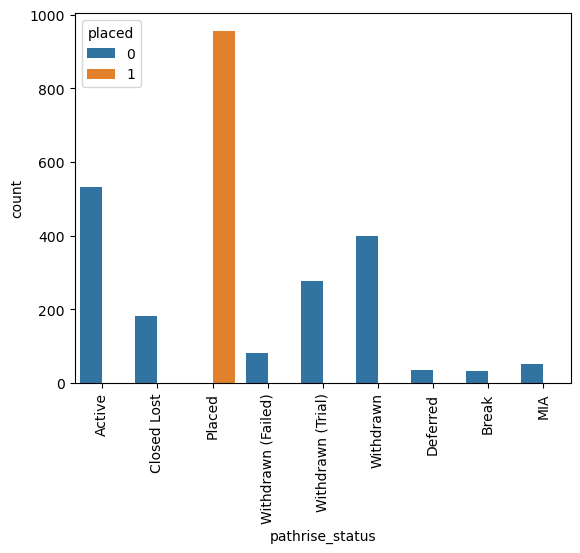

In [11]:
sns.countplot(data=df, x='pathrise_status', hue='placed')
plt.xticks(rotation=90)

In [12]:
#check the relation between pathrise_status and Active or Break with program_duration_days (target feature).
df[(df["pathrise_status"] =="Active") | (df["pathrise_status"]=="Break")]["program_duration_days"].unique()

array([nan])

In [13]:
#check the relation between pathrise_status and Active or Break with placed (target feature).
df[(df["pathrise_status"] == "Active" ) | (df["pathrise_status"]=="Break")] ["placed"].unique()

array([0], dtype=int64)

so, there is no relation between this rows and target features, we can drop them from the dataset. 

#### primary_track

primary_track feature is a categorical feature. it needs to be converted to numerical for using in ML models.

#### cohort_tag

In [14]:
# extract month from cohort_tag
df["cohort_tag_month"] = df["cohort_tag"].str[:3]
df["cohort_tag_month"].unique()

array(['OCT', 'JAN', 'AUG', 'SEP', 'DEC', 'FEB', 'NOV', 'JUL', 'APR',
       'MAR', 'JUN', 'MAY', nan], dtype=object)

<AxesSubplot:xlabel='cohort_tag_month', ylabel='count'>

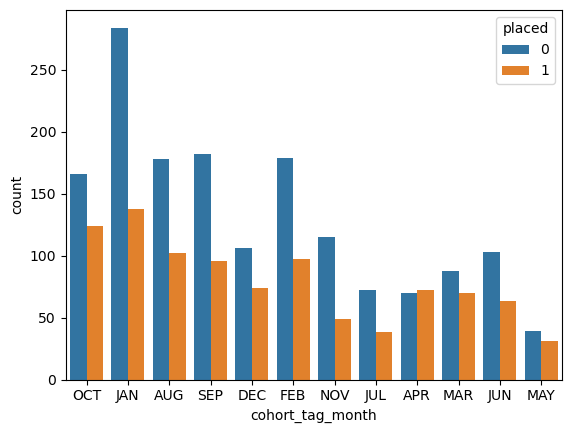

In [15]:
sns.countplot(data=df, x="cohort_tag_month", hue= "placed")

In [16]:
# extract fortnight symbol from cohort_tag
df["cohort_tag_fortnight"] = df["cohort_tag"].str[-1:]
df["cohort_tag_fortnight"].unique()

array(['A', 'B', 'C', 'a', nan], dtype=object)

<AxesSubplot:xlabel='cohort_tag_fortnight', ylabel='count'>

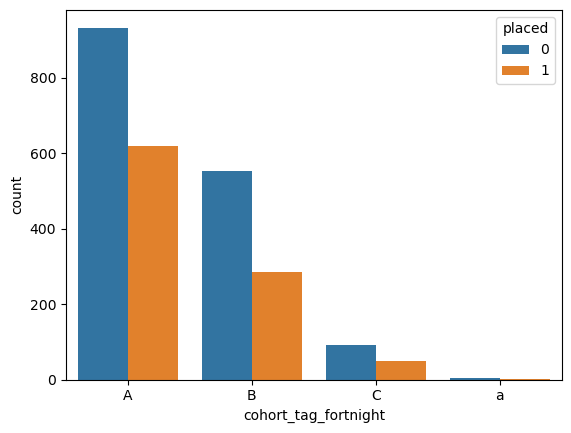

In [17]:
sns.countplot(data=df, x="cohort_tag_fortnight", hue= "placed")

#### program_duration_days and placed

**Target features** are program_duration_days and placed. program_duration_days is a Regression target and placed is a classification target

#### employment_status, highest_level_of_education, length_of_job_search, biggest_challenge_in_search , professional_experience, and work_authorization_status

All these features are categorical and they need to be converted to numerical for using in ML models.

In [18]:
#not necessary
categorical_features=['primary_track',
        'employment_status',
        'highest_level_of_education', 
        'length_of_job_search',
        'biggest_challenge_in_search',
        'professional_experience',
        'work_authorization_status',
        'gender',
        'race']

In [19]:
#not necessary
df_categorical_features = df[categorical_features]

#### employment_status

It makes sense that students and unemployed people are more willing to participate in the program.

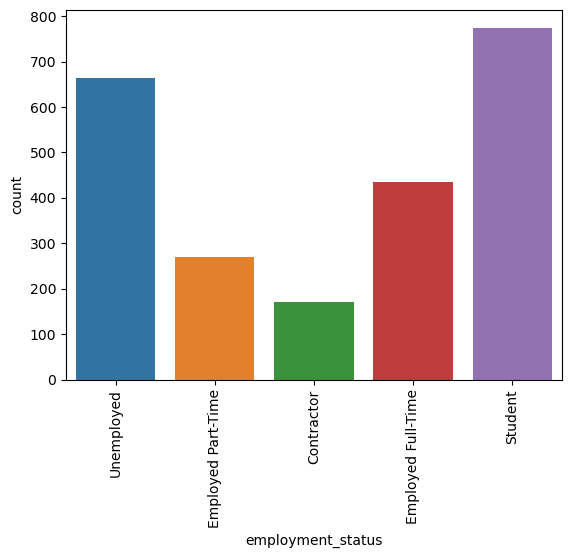

In [20]:
sns.countplot(x= 'employment_status', data=df)
plt.xticks(rotation=90)
plt.show()

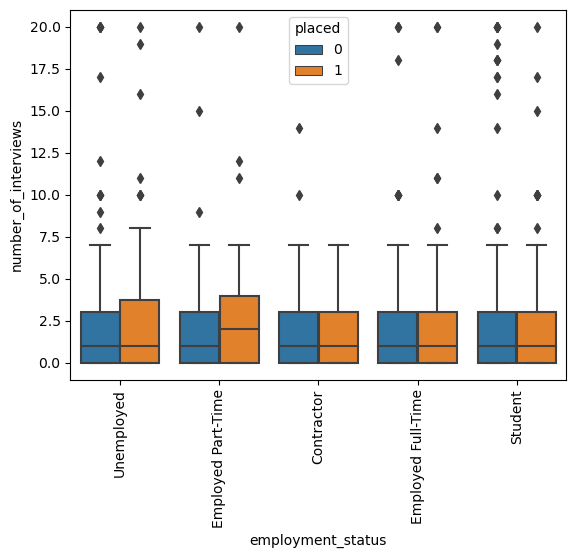

In [21]:
sns.boxplot(data=df, x='employment_status', y='number_of_interviews', hue='placed')
plt.xticks(rotation=90)
plt.show()

#### highest_level_of_education


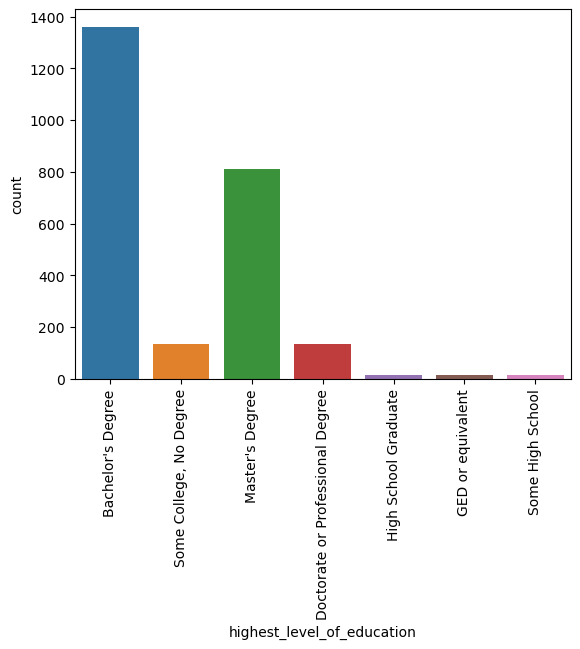

In [22]:
sns.countplot(x= "highest_level_of_education" , data=df)
plt.xticks(rotation=90)
plt.show()

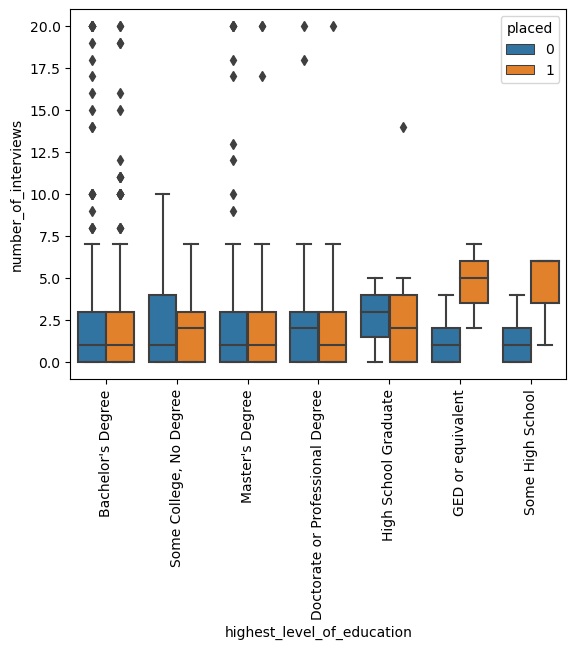

In [23]:
sns.boxplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed')
plt.xticks(rotation=90)
plt.show()

#### length_of_job_search


In [24]:
df['length_of_job_search'].unique()


array(['3-5 months', 'Less than one month', '1-2 months',
       '6 months to a year', nan, 'Over a year'], dtype=object)

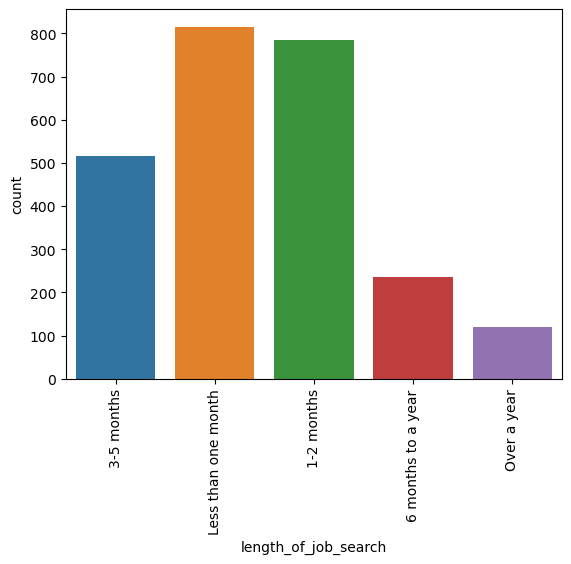

In [25]:
sns.countplot(x= 'length_of_job_search', data=df)
plt.xticks(rotation=90)
plt.show()

In [26]:
df_count=df['length_of_job_search'].value_counts()
df_count

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: length_of_job_search, dtype: int64

In [27]:
count=list(df_count.values)
index=list(df_count.index)
print(count)
print(index)

[815, 785, 515, 235, 120]
['Less than one month', '1-2 months', '3-5 months', '6 months to a year', 'Over a year']


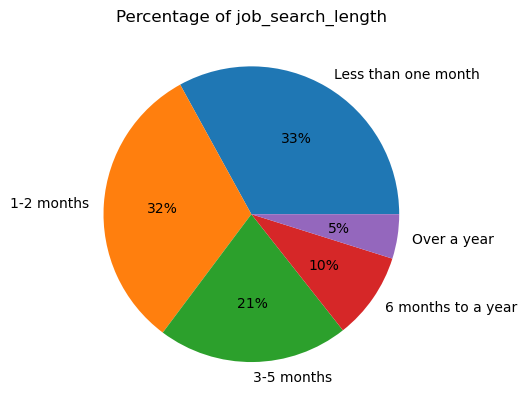

In [28]:
#The percentage of job_search_length by Pie Chart
plt.pie(count,labels=index, autopct='%.0f%%')
plt.title('Percentage of job_search_length')
plt.show()

In [29]:
#Classification of placed and non-placced data
df_placed=df[df["placed"]==1]
df_unplaced=df[df["placed"]!=1]

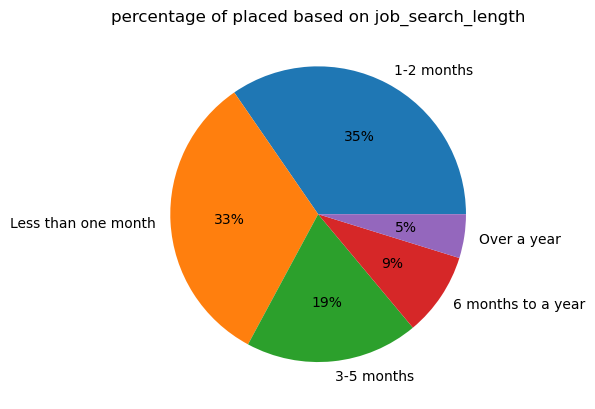

In [30]:
#The percentage of job_search_length "placed" by Pie Chart
df_count_placed=df_placed['length_of_job_search'].value_counts()
count_placed=list(df_count_placed.values)
index_placed=list(df_count_placed.index)
plt.pie(count_placed, labels=index_placed, autopct='%.0f%%')
plt.title("percentage of placed based on job_search_length")
plt.show()

In [31]:
print (df_count_placed)

1-2 months             318
Less than one month    299
3-5 months             174
6 months to a year      84
Over a year             44
Name: length_of_job_search, dtype: int64


#### professional_experience

It does make sense the experienced people don't need to participate in this program.

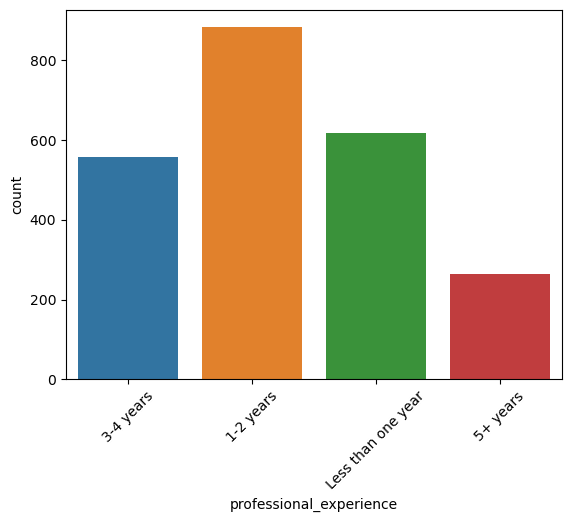

In [32]:
sns.countplot(x= "professional_experience", data=df)
plt.xticks(rotation=45)
plt.show()

#### number_of_interviews and number_of_applications

These features are numerical and helpful and has effect on target features. the more number of interviews and number of applications, the more chance of getting placed!

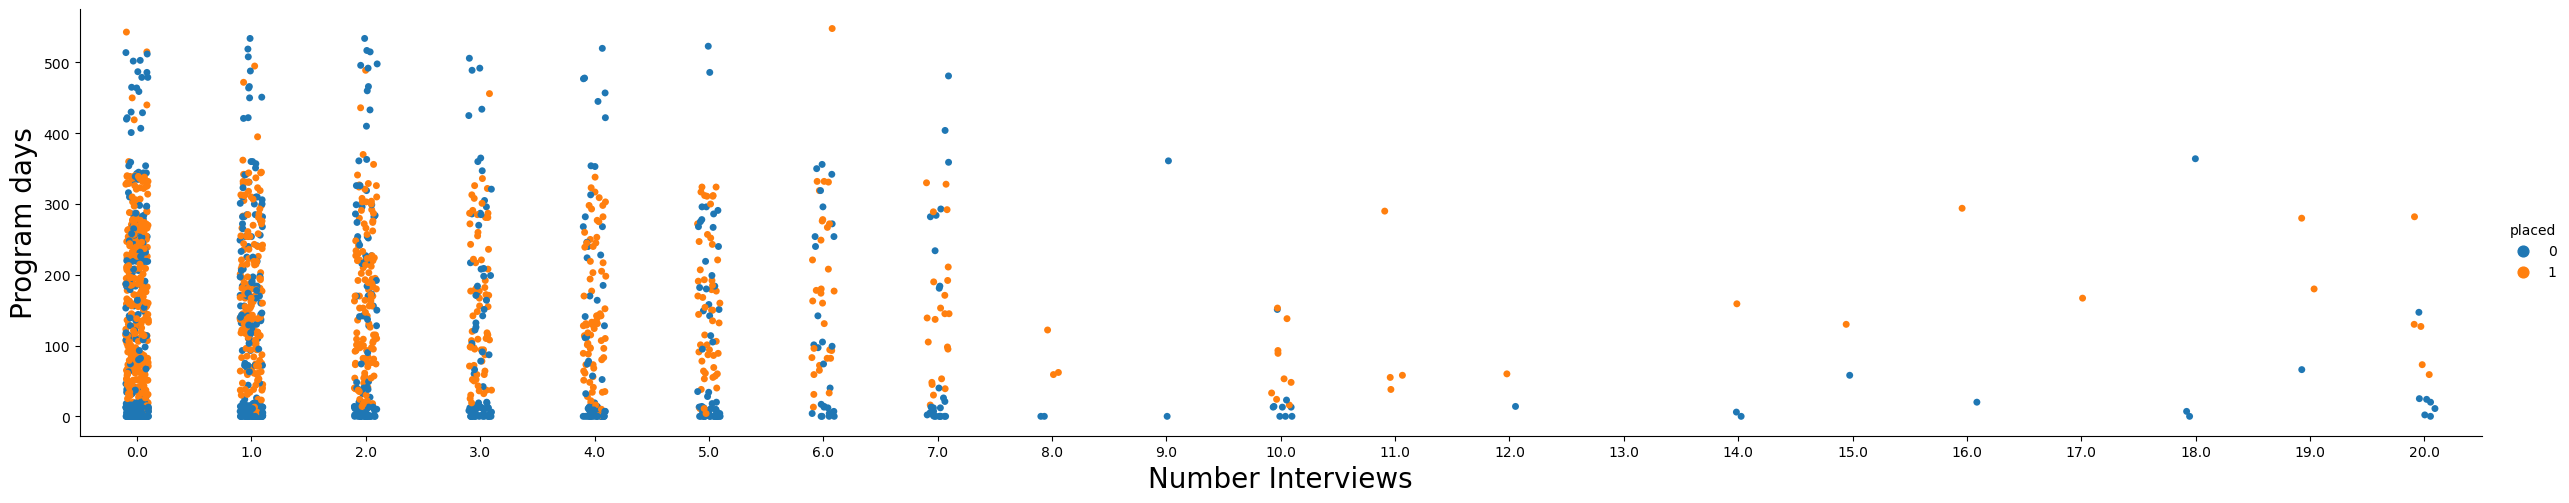

In [33]:
sns.catplot(x='number_of_interviews', y='program_duration_days', hue='placed', data=df, aspect=5)
plt.xlabel("Number Interviews",fontsize=20)
plt.ylabel("Program days",fontsize=20)
plt.show()

#### gender

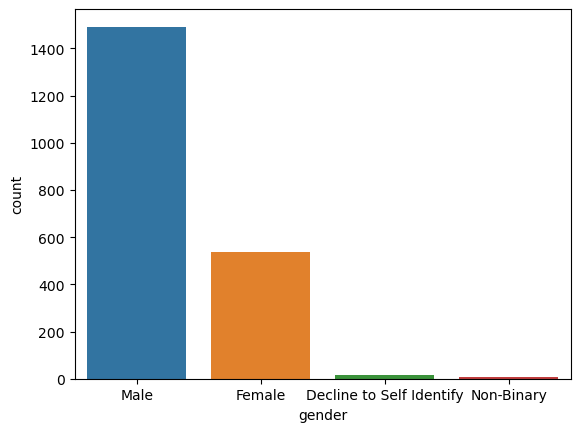

In [34]:
sns.countplot(x='gender', data=df)
plt.show()

#### race

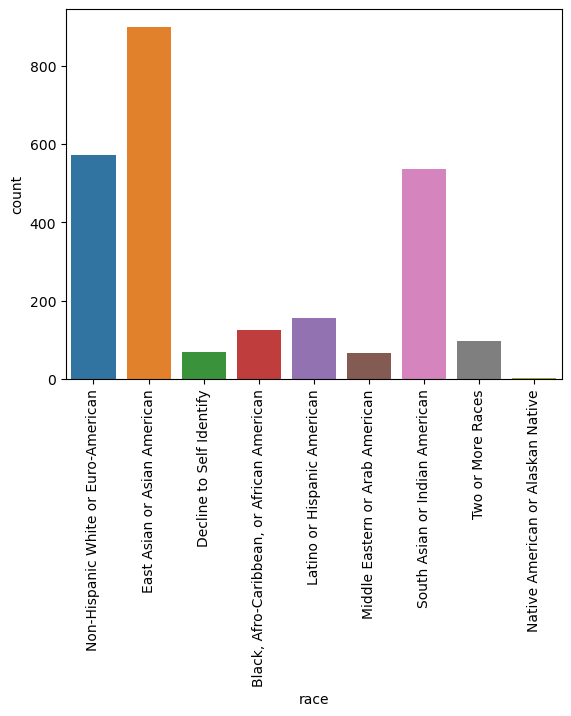

In [35]:
sns.countplot(x= 'race', data=df)
plt.xticks(rotation=90)
plt.show()

#### The percentage of highest_level_of_education "placed" by Pie Chart 

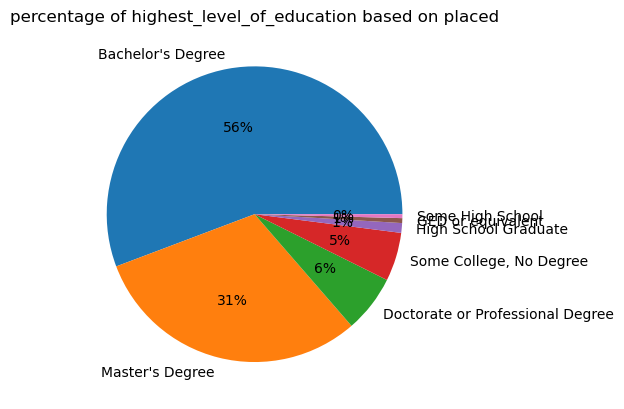

In [36]:
df_count_placed=df_placed['highest_level_of_education'].value_counts()
count_placed=list(df_count_placed.values)
index_placed=list(df_count_placed.index)
plt.pie(count_placed,labels=index_placed, autopct='%.0f%%')
plt.title("percentage of highest_level_of_education based on placed")
plt.show()

#### The percentage of professional_experience "placed" by Pie Chart

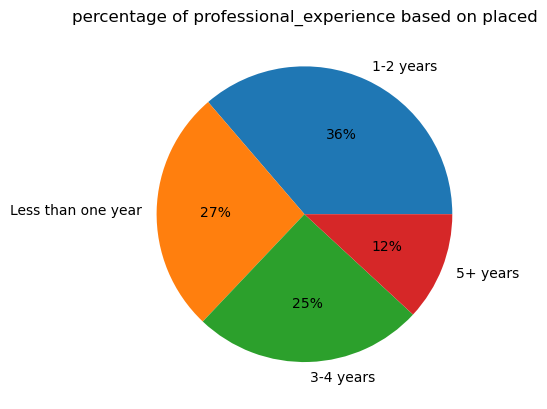

In [37]:
df_count_placed=df_placed['professional_experience'].value_counts()
count_placed=list(df_count_placed.values)
index_placed=list(df_count_placed.index)
plt.pie(count_placed,labels=index_placed, autopct='%.0f%%')
plt.title("percentage of professional_experience based on placed")
plt.show()

## Feature Engineering

### Remove Unnecessary Data 

We can drop the features which have no effect on the target.

In [38]:
df.drop(['id', 'pathrise_status', 'cohort_tag', 'cohort_tag_month', 'cohort_tag_fortnight'], axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2315 non-null   object 
 4   highest_level_of_education   2486 non-null   object 
 5   length_of_job_search         2470 non-null   object 
 6   biggest_challenge_in_search  2520 non-null   object 
 7   professional_experience      2322 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_interviews         2326 non-null   float64
 10  number_of_applications       2544 non-null   int64  
 11  gender                       2052 non-null   object 
 12  race                         2526 non-null   object 
dtypes: float64(2), int

### Convert categorical features to numerical

In [40]:
df_dummy= pd.get_dummies(df[['primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']])


In [41]:
df_dummy.head()

,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Contractor,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [42]:
df.drop(['primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race'], axis=1, inplace = True)


In [43]:
df= pd.concat([df, df_dummy], axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 63 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1928 non-null   float64
 1   placed                                                            2544 non-null   int64  
 2   number_of_interviews                                              2326 non-null   float64
 3   number_of_applications                                            2544 non-null   int64  
 4   primary_track_Data                                                2544 non-null   uint8  
 5   primary_track_Design                                              2544 non-null   uint8  
 6   primary_track_Marketing                                           2544 non-null   uint8  
 7   primary_track_PSO                

### Cast all numeric columns to float64

In [45]:
df = df.astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 63 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1928 non-null   float64
 1   placed                                                            2544 non-null   float64
 2   number_of_interviews                                              2326 non-null   float64
 3   number_of_applications                                            2544 non-null   float64
 4   primary_track_Data                                                2544 non-null   float64
 5   primary_track_Design                                              2544 non-null   float64
 6   primary_track_Marketing                                           2544 non-null   float64
 7   primary_track_PSO                

### Manipulate Missing Values

In [1]:
#Dropping null values from number_of_interviews
df=df.dropna(subset=['number_of_interviews'])
df.info()

NameError: name 'df' is not defined

In [48]:
#Replacing mean of program_duration_days with its null vales
mean = df["program_duration_days"].mean()
df["program_duration_days"] = df["program_duration_days"].replace(np.nan, mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2543
Data columns (total 63 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             2326 non-null   float64
 1   placed                                                            2326 non-null   float64
 2   number_of_interviews                                              2326 non-null   float64
 3   number_of_applications                                            2326 non-null   float64
 4   primary_track_Data                                                2326 non-null   float64
 5   primary_track_Design                                              2326 non-null   float64
 6   primary_track_Marketing                                           2326 non-null   float64
 7   primary_track_PSO                

## Save the preprocessed dataset 

We can save the dataset to use it for the next stage which is ML.

In [49]:
#Save the dataset in the same folder:
df.to_csv("Pathrise_Preprocessed_Data.csv")

#### DONE! Now preprocessed dataset is ready for model training, model building and model testing.